In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_roc_curve, accuracy_score, confusion_matrix, classification_report
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import joblib

import warnings
warnings.filterwarnings('ignore')

# Data Collection

In [ ]:
df = pd.read_csv(r'C:\Users\Shubham\Desktop\Projects\Evaluation\Loan\loan_prediction.csv')

# Data Understanding

In [ ]:
df.shape #Shape of the Dataset

(614, 13)

In [ ]:
pd.set_option("display.max_columns", None)
df.head() #Looking into the top 5 rows of the dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.info() #Basic info of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


We see that the data is a mix of object and int type. We shall convert all the object type into numerical ones so we could move ahead with the model predictions

In [ ]:
df.isnull().sum() #Checking for null values

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

We see the presence of null values in the data, we shall treat for it in the EDA while we look at each column at a time.

In [ ]:
df.describe() #Statistical evaluation of the dataset

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
df.columns #Calling all the column names of the dataset

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Exploratory Data Analysis

Let us now look into all the columns one at a time, beginning with the target column 'Loan_Status'

In [ ]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

We see that the data is slightly imbalanced and we shall treat it for same at the stage of model predictions. However, let us encode the data to convert into numerical feature

In [ ]:
#Encoding the data
le = LabelEncoder()
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

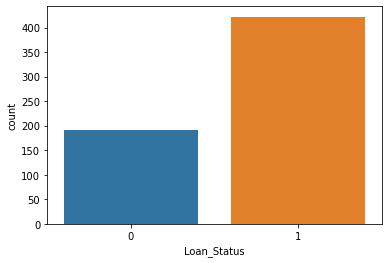

In [ ]:
#Countplot for the target feature
sns.countplot(df['Loan_Status'])

<AxesSubplot:xlabel='Loan_Status'>

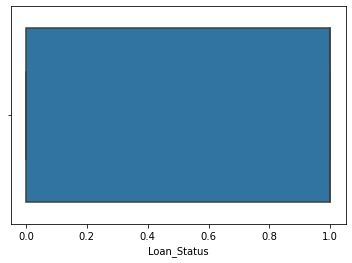

In [ ]:
#Boxplot for the target feature
sns.boxplot(df['Loan_Status'])

Now we look into the independent variables one column at a time

The first column we have is the loan ID, which is unique for every application and can be termed as an indexing for the current database. Therefore, this column should not influence the prediction model and hence we drop this column

In [ ]:
df = df.drop(columns='Loan_ID')

The next column is 'gender', which is a classification type and we see from above that there are 13 null values present in the data.

In [ ]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [ ]:
#Replacing the null data with the mode of the data
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

In [ ]:
#Encoding the data
df['Gender'] = le.fit_transform(df['Gender'])

In [ ]:
df['Gender'].value_counts()

1    502
0    112
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

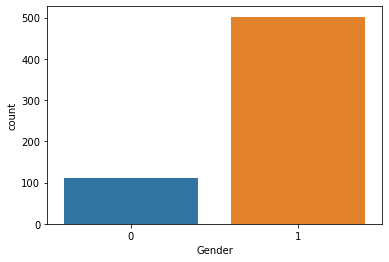

In [ ]:
#Countplot for the feature
sns.countplot(df['Gender'])

<AxesSubplot:xlabel='Gender'>

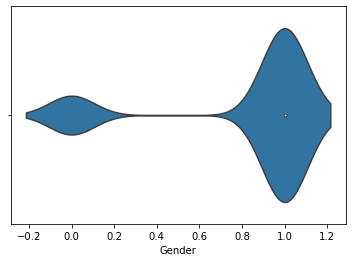

In [ ]:
#Violinplot for the feature
sns.violinplot(df['Gender'])

The next column is the married column, which is again a classification type with 3 null values. Let us get into it

In [ ]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [ ]:
#Filling null values with mode data
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])

In [ ]:
#Encoding the data
df['Married'] = le.fit_transform(df['Married'])

In [ ]:
df['Married'].value_counts()

1    401
0    213
Name: Married, dtype: int64

<AxesSubplot:xlabel='Married', ylabel='count'>

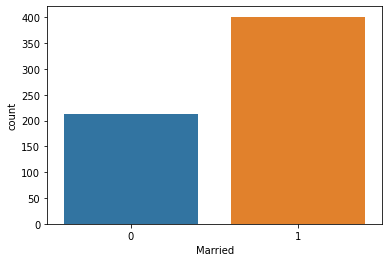

In [ ]:
#Countplot for the feature
sns.countplot(df['Married'])

<AxesSubplot:xlabel='Married'>

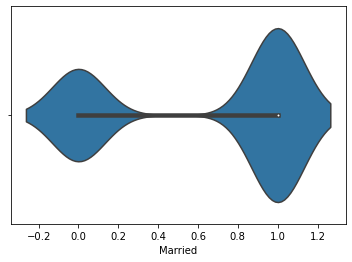

In [ ]:
#Violinplot for the feature
sns.violinplot(df['Married'])

The next column is the Dependents column, which is a classification type with 15 null values. Let us get into it

In [ ]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [ ]:
#Filling null values with mode data
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])

In [ ]:
#Encoding the data
df['Dependents'] = le.fit_transform(df['Dependents'])

<AxesSubplot:xlabel='Dependents', ylabel='count'>

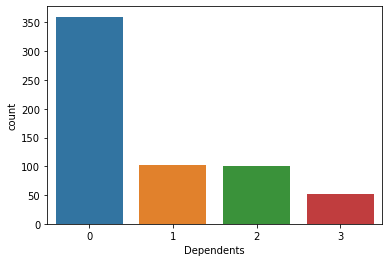

In [ ]:
#Countplot for the feature
sns.countplot(df['Dependents'])

<AxesSubplot:xlabel='Dependents'>

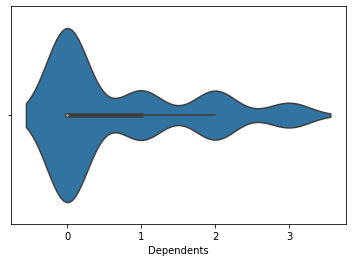

In [ ]:
#Violinplot for the feature
sns.violinplot(df['Dependents'])

The next column is the Education column, which is a classification type with no null values. Let us get into it

In [ ]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [ ]:
#Encoding the data
df['Education'] = le.fit_transform(df['Education'])

<AxesSubplot:xlabel='Education', ylabel='count'>

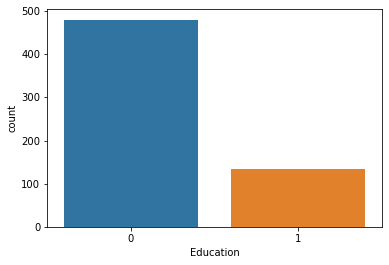

In [ ]:
#Countplot for the feature
sns.countplot(df['Education'])

<AxesSubplot:xlabel='Education'>

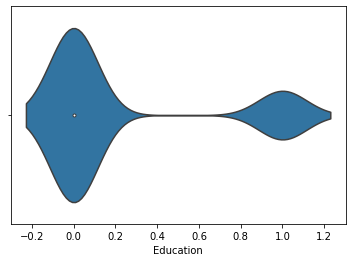

In [ ]:
#Violinplot for the feature
sns.violinplot(df['Education'])

The next column is the Self_Employed column, which is a classification type with 32 null values. Let us get into it

In [ ]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [ ]:
#Filling null values with mode data
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [ ]:
#Encoding the data
df['Self_Employed'] = le.fit_transform(df['Self_Employed'])

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

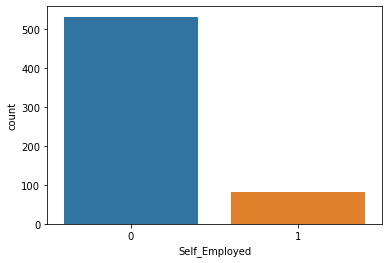

In [ ]:
#Countplot for the feature
sns.countplot(df['Self_Employed'])

<AxesSubplot:xlabel='Self_Employed'>

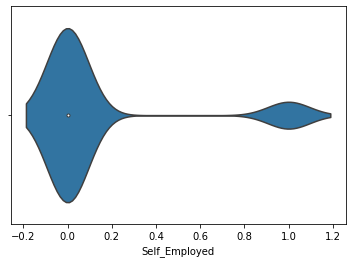

In [ ]:
#Violinplot for the feature
sns.violinplot(df['Self_Employed'])

The next column is the ApplicantIncome column, which is a regression type with no null values. Let us get into it

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

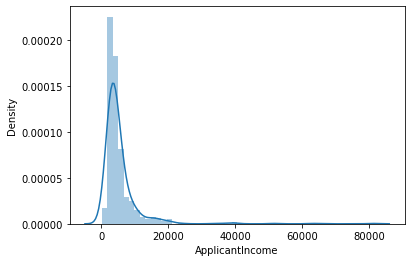

In [ ]:
#Densityplot for the feature
sns.distplot(df['ApplicantIncome'])

<AxesSubplot:xlabel='ApplicantIncome'>

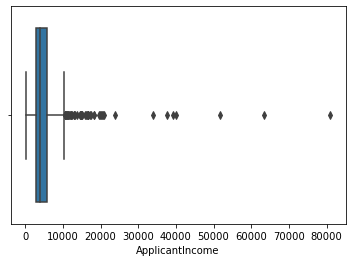

In [ ]:
#Boxplot for the feature
sns.boxplot(df['ApplicantIncome'])

The next column is the CoapplicantIncome column, which is a regression type with no null values. Let us get into it

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

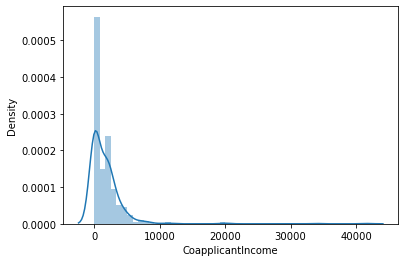

In [ ]:
#Densityplot for the feature
sns.distplot(df['CoapplicantIncome'])

<AxesSubplot:xlabel='CoapplicantIncome'>

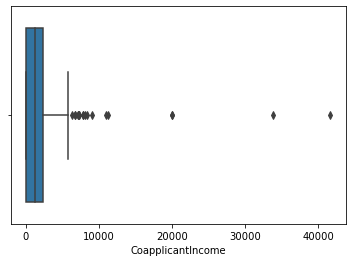

In [ ]:
#Boxplot for the feature
sns.boxplot(df['CoapplicantIncome'])

The next column is the LoanAmount column, which is a regression type with 22 null values. Let us get into it

In [ ]:
#Filling null values with mean data
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

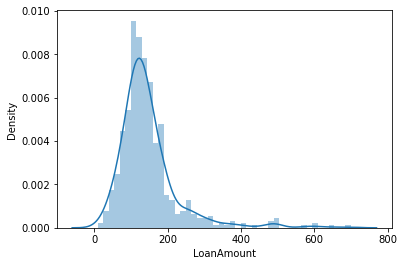

In [ ]:
#Densityplot for the feature
sns.distplot(df['LoanAmount'])

<AxesSubplot:xlabel='LoanAmount'>

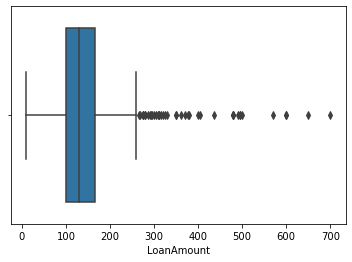

In [ ]:
#Boxplot for the feature
sns.boxplot(df['LoanAmount'])

The next column is the Loan_Amount_Term column, which is a classification type with 14 null values. Let us get into it

In [ ]:
#Filling null values with mean data
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

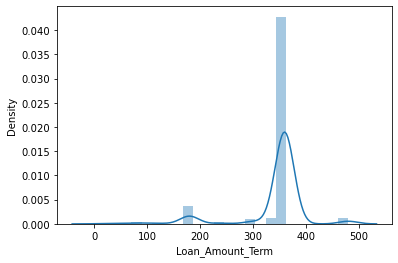

In [ ]:
#Densityplot for the feature
sns.distplot(df['Loan_Amount_Term'])

<AxesSubplot:xlabel='Loan_Amount_Term'>

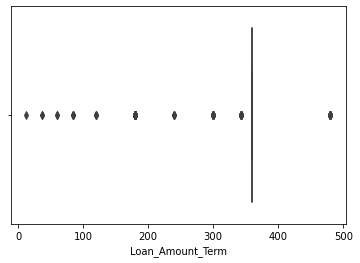

In [ ]:
#Boxplot for the feature
sns.boxplot(df['Loan_Amount_Term'])

The next column is the Credit_History column, which is a classification type with 50 null values. Let us get into it

In [ ]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [ ]:
#Filling null values with mean data
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

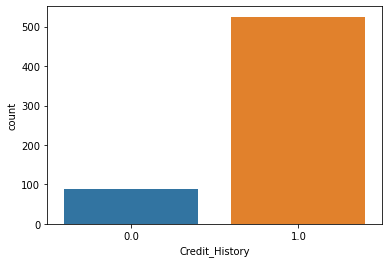

In [ ]:
#Countplot for the feature
sns.countplot(df['Credit_History'])

<AxesSubplot:xlabel='Credit_History'>

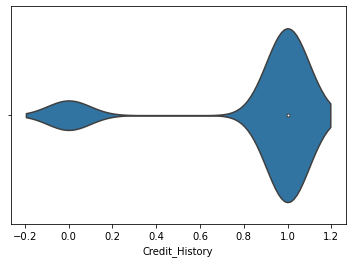

In [ ]:
#Violinplot for the feature
sns.violinplot(df['Credit_History'])

The next column is the Property_Area column, which is a classification type with no null values. Let us get into it

In [ ]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [ ]:
#Encoding the data
df['Property_Area'] = le.fit_transform(df['Property_Area'])

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

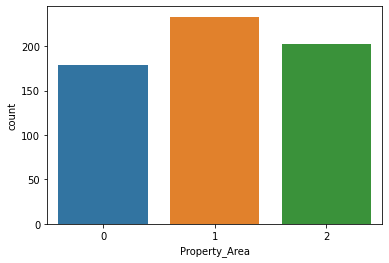

In [ ]:
#Countplot for the feature
sns.countplot(df['Property_Area'])

<AxesSubplot:xlabel='Property_Area'>

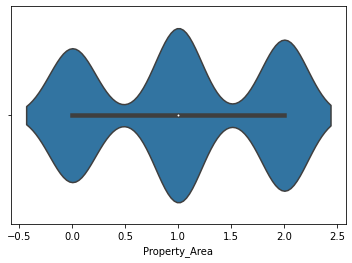

In [ ]:
#Violinplot for the feature
sns.violinplot(df['Property_Area'])

# Null Values

We check if there are any null values left in the data

In [ ]:
df.isnull().sum() #Checking for null values

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

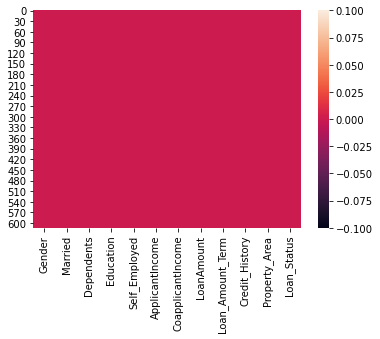

In [ ]:
sns.heatmap(df.isnull()) #Visualization of null values

We see that there are no null values in the dataset

# Correlation

Now, since all the data has been transformed into numeric values. Let us check for the correlation to the target column

In [ ]:
df.corr() #Correlation matrix

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.101054,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.077242,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,0.011134,0.010522,-0.059187
LoanAmount,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.001431,-0.044776,-0.036416
Loan_Amount_Term,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.000432,-0.077620,-0.020974
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.001431,0.000432,1.000000,0.001963,0.540556


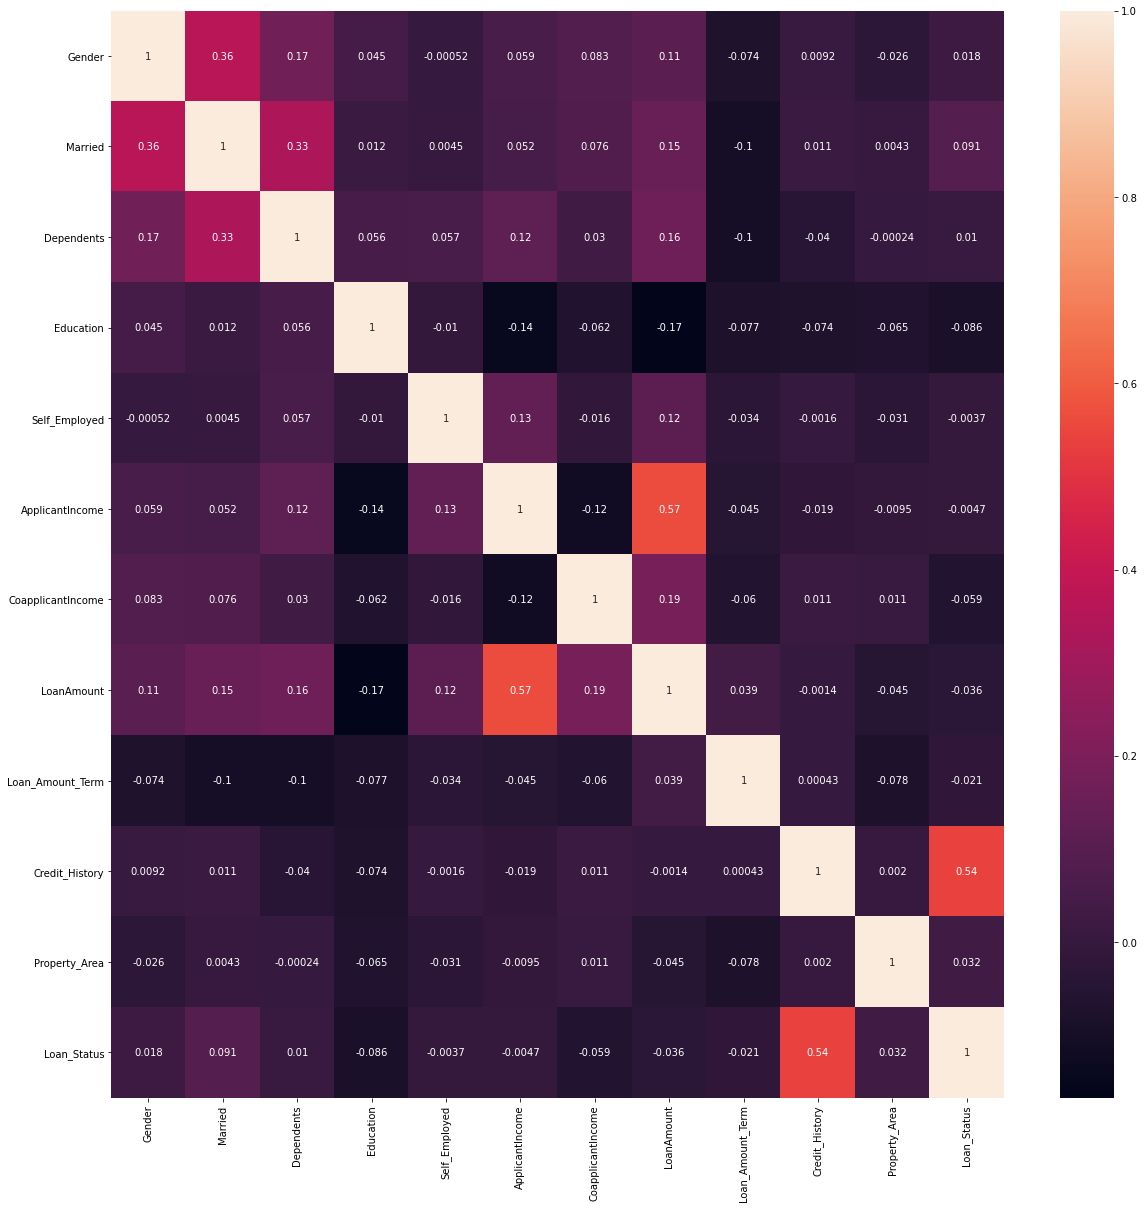

In [ ]:
#Visualization for correlation matrix
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

We see that the column Credit_History play a high correlation to the Loan_Status.

In [ ]:
#Correlation wrt target column
df.corr()['Loan_Status'].sort_values()

Education           -0.085884
CoapplicantIncome   -0.059187
LoanAmount          -0.036416
Loan_Amount_Term    -0.020974
ApplicantIncome     -0.004710
Self_Employed       -0.003700
Dependents           0.010118
Gender               0.017987
Property_Area        0.032112
Married              0.091478
Credit_History       0.540556
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

# Outliers

We use the zscore method to remove the outliers with a threshold of 3

In [ ]:
z = np.abs(zscore(df))
df_new = df[(z<3).all(axis=1)]

In [ ]:
df_new.shape

(577, 12)

In [ ]:
print('Percentage loss of data =\t', ((df.shape[0]-df_new.shape[0])/df.shape[0])*100, '%')

Percentage loss of data =	 6.026058631921824 %


In [ ]:
df = df_new

# Skewness

Now, we split the data into feature and target columns.

In [ ]:
# Target = Loan_Status
x = df.drop(columns='Loan_Status')
y = df['Loan_Status']

In [ ]:
x.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.077031
Credit_History      -1.976043
Property_Area       -0.055332
dtype: float64

In [ ]:
k = []
for i in x.columns:
    k.append(np.abs(x[i].skew()))

b=0
for i in x.columns:
    if k[b]>0.5:
        x[i] = np.sqrt(x[i])
    b+=1

In [ ]:
x.skew()

Gender              -1.622920
Married             -0.630211
Dependents           0.610338
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      1.208613
CoapplicantIncome    0.207591
LoanAmount           0.320372
Loan_Amount_Term    -2.456414
Credit_History      -1.976043
Property_Area       -0.055332
dtype: float64

# Best Random State

In [ ]:
maxRS = 0
maxAcc = 0
for i in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc>maxAcc:
        maxAcc = acc
        maxRS = i
print("Max accuracy: \t", maxAcc)
print("Random State: \t", maxRS)

Max accuracy: 	 0.9051724137931034
Random State: 	 12


Now since we got the best random state for data modelling, we create the test train models

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=maxRS)

# Upsampling the Training Dataset

In [ ]:
U = pd.concat([x_train,y_train], axis=1) #Joining the train dataset

In [ ]:
more = U[U['Loan_Status']==1]
less = U[U['Loan_Status']==0]

In [ ]:
upsample = resample(less,
                    replace=True, #Sample with replacement
                    n_samples=len(more), #matching with the majority class
                    random_state=maxRS) #Reproductible results

In [ ]:
new_U = pd.concat([more,upsample])

In [ ]:
new_U['Loan_Status'].value_counts()

0    309
1    309
Name: Loan_Status, dtype: int64

In [ ]:
x_train = new_U.drop(columns='Loan_Status')
y_train = new_U['Loan_Status']

# Model Predictions

Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
print("Accuracy: \t", accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 	 86.20689655172413
[[19  8]
 [ 8 81]]
              precision    recall  f1-score   support

           0       0.70      0.70      0.70        27
           1       0.91      0.91      0.91        89

    accuracy                           0.86       116
   macro avg       0.81      0.81      0.81       116
weighted avg       0.86      0.86      0.86       116



K-Nearest Neighbors

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
print("Accuracy: \t", accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 	 49.137931034482754
[[ 9 18]
 [41 48]]
              precision    recall  f1-score   support

           0       0.18      0.33      0.23        27
           1       0.73      0.54      0.62        89

    accuracy                           0.49       116
   macro avg       0.45      0.44      0.43       116
weighted avg       0.60      0.49      0.53       116



Support Vector Classifier

In [ ]:
svc = SVC()
svc.fit(x_train, y_train)
pred = svc.predict(x_test)
print("Accuracy: \t", accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 	 45.689655172413794
[[11 16]
 [47 42]]
              precision    recall  f1-score   support

           0       0.19      0.41      0.26        27
           1       0.72      0.47      0.57        89

    accuracy                           0.46       116
   macro avg       0.46      0.44      0.42       116
weighted avg       0.60      0.46      0.50       116



Decision Tree Classifier

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred = dt.predict(x_test)
print("Accuracy: \t", accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 	 75.86206896551724
[[20  7]
 [21 68]]
              precision    recall  f1-score   support

           0       0.49      0.74      0.59        27
           1       0.91      0.76      0.83        89

    accuracy                           0.76       116
   macro avg       0.70      0.75      0.71       116
weighted avg       0.81      0.76      0.77       116



Random Forest Classifier

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print("Accuracy: \t", accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 	 82.75862068965517
[[19  8]
 [12 77]]
              precision    recall  f1-score   support

           0       0.61      0.70      0.66        27
           1       0.91      0.87      0.89        89

    accuracy                           0.83       116
   macro avg       0.76      0.78      0.77       116
weighted avg       0.84      0.83      0.83       116



We see that the Logistic Regression gives the most efficiency of 86.20%

# Cross Validation

In [ ]:
scr1 = cross_val_score(lr, x, y, cv=5)
print("Cross validation score of Logistic Regression is: \t", scr1.mean())

Cross validation score of Logistic Regression is: 	 0.8180809595202397


In [ ]:
scr2 = cross_val_score(knn, x, y, cv=5)
print("Cross validation score of KNN is: \t", scr2.mean())

Cross validation score of KNN is: 	 0.6428785607196403


In [ ]:
scr3 = cross_val_score(svc, x, y, cv=5)
print("Cross validation score of SVC is: \t", scr3.mean())

Cross validation score of SVC is: 	 0.6897751124437781


In [ ]:
scr4 = cross_val_score(dt, x, y, cv=5)
print("Cross validation score of Decision Tree is: \t", scr4.mean())

Cross validation score of Decision Tree is: 	 0.7141529235382309


In [ ]:
scr5 = cross_val_score(rf, x, y, cv=5)
print("Cross validation score of Random Forest is: \t", scr5.mean())

Cross validation score of Random Forest is: 	 0.7955622188905547


We can see that Logistic Regression performs the best among others

# Hyper Parameter Tuning

In [ ]:
GridSearchCV.get_params(lr) #Getting the parameters for Logistic Regression

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
#Adding parameters to tune the model to best efficiency
parameters = {'C': [1.0,2.0,3.0],
              'fit_intercept': [True,False],
              'max_iter': [100, 200,300],
              'random_state': [10,20,None],
              'tol': [0.0001,0.0002,0.0003]}

In [ ]:
gcv = GridSearchCV(lr, parameters, cv=5, scoring='accuracy')

In [ ]:
#Fitting the parameters
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1.0, 2.0, 3.0], 'fit_intercept': [True, False],
                         'max_iter': [100, 200, 300],
                         'random_state': [10, 20, None],
                         'tol': [0.0001, 0.0002, 0.0003]},
             scoring='accuracy')

In [ ]:
#Finding the best score
gcv.best_score_

0.6973249409913455

In [ ]:
#Finding the best parameters
gcv.best_params_

{'C': 2.0,
 'fit_intercept': True,
 'max_iter': 200,
 'random_state': 10,
 'tol': 0.0001}

In [ ]:
gcv_pred = gcv.best_estimator_.predict(x_test)
accuracy_score(y_test,gcv_pred)

0.8620689655172413

We see the accuracy is 86.2%

# ROC AUC Plot

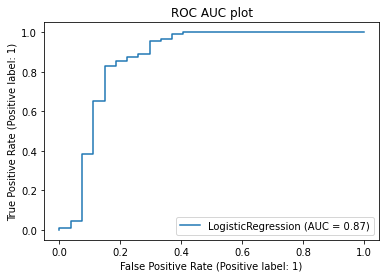

In [ ]:
plot_roc_curve(gcv.best_estimator_,x_test,y_test)
plt.title("ROC AUC plot")
plt.show()

The AUC score of 87% is very good

# Saving the best model

In [ ]:
joblib.dump(gcv.best_estimator_,"loan_status.pkl")

['loan_status.pkl']